In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
def show_images(inp_img, out_img):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(inp_img, cv2.COLOR_BGR2RGB))
    plt.title('Source Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))
    plt.title('Output Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def save_image(img):
   cv2.imwrite('../data/out_images/fattal_result.png', img)


In [3]:
image = cv2.imread('../data/inp_images/tower.jpeg')

In [4]:
# Bước 1: Áp dụng CLAHE
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)  # Chuyển sang LAB để tăng sáng
l, a, b = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
l = clahe.apply(l)

enhanced_lab = cv2.merge([l, a, b])
enhanced_image = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)
# cv2.imwrite('fattal_step1.jpg', enhanced_image)  # Lưu ảnh

In [5]:
# Bước 2: Tăng bão hòa và độ sáng
hsv = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
s = cv2.add(s, 50)
v = cv2.add(v, 30)

enhanced_hsv = cv2.merge([h, s, v])
fattal_effect = cv2.cvtColor(enhanced_hsv, cv2.COLOR_HSV2BGR)
# cv2.imwrite('fattal_final.jpg', fattal_effect)  # Lưu ảnh cuối

In [6]:
# Chuyển ảnh từ BGR sang RGB để hiển thị đúng màu với matplotlib
step1_rgb = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB)
final_rgb = cv2.cvtColor(fattal_effect, cv2.COLOR_BGR2RGB)

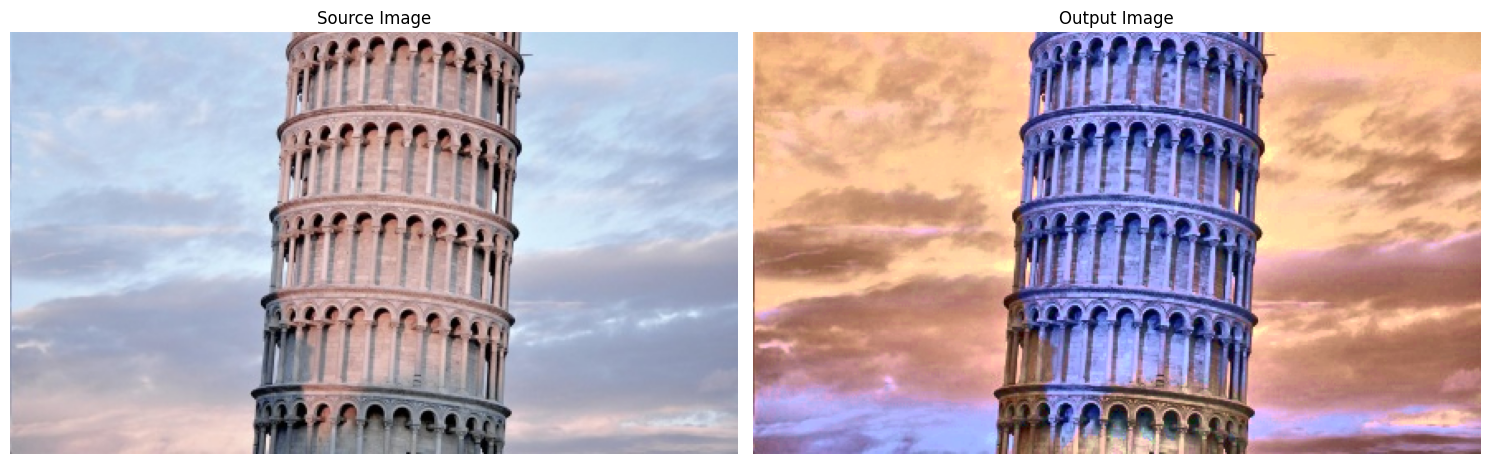

In [7]:
show_images(image, final_rgb)
save_image(final_rgb)